In [250]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt 
import seaborn as sns

In [251]:
# load custom-prepared dataset, containing current win margins for each year
dataset = pickle.load(open('Datasets/data-SAMEYEAR.p', 'rb'))
dataset.columns, dataset.shape

(Index(['district', 'state', 'year', 'party', 'candidatevotes', 'totalvotes',
        'candidate', 'national_poll', 'previous_party', 'dem_win_margin_prev',
        'rep_win_margin_prev', 'margin_signed_minus_prev',
        'margin_signed_divide_prev', 'margin_unsigned_minus_prev',
        'margin_unsigned_divide_prev', 'dem_win_prev', 'rep_win_prev',
        'dem_win', 'rep_win'],
       dtype='object'), (1269, 19))

In [252]:
dataset.head()

,district,state,year,party,candidatevotes,totalvotes,candidate,national_poll,previous_party,dem_win_margin_prev,rep_win_margin_prev,margin_signed_minus_prev,margin_signed_divide_prev,margin_unsigned_minus_prev,margin_unsigned_divide_prev,dem_win_prev,rep_win_prev,dem_win,rep_win
AK_01_2012,1,AK,2012,republican,185296.0,289804.0,Don Young,1.988304,republican,0.286149,0.639384,-0.353235,0.447538,0.353235,2.234447,0.0,1.0,0.0,1.0
AL_01_2012,1,AL,2012,republican,196374.0,200676.0,Jo Bonner,1.988304,republican,0.021438,0.978562,-0.957125,0.021907,0.957125,45.647141,0.0,1.0,0.0,1.0
AL_02_2012,2,AL,2012,republican,180591.0,283953.0,Martha Roby,1.988304,republican,0.363060,0.635989,-0.272929,0.570859,0.272929,1.751746,0.0,1.0,0.0,1.0
AL_03_2012,3,AL,2012,republican,175306.0,273930.0,Mike Rogers,1.988304,republican,0.358270,0.639966,-0.281696,0.559827,0.281696,1.786267,0.0,1.0,0.0,1.0
AL_04_2012,4,AL,2012,republican,199071.0,269118.0,Robert B. Aderholt,1.988304,republican,0.259016,0.739716,-0.480700,0.350156,0.480700,2.855866,0.0,1.0,0.0,1.0


In [253]:
# pivot table of win margins (Dem - Rep) for each congressional district, across elections
win_margin_pt = pd.pivot_table(dataset, index=["state", "district"], columns = 'year', values = 'margin_signed_minus_prev')
win_margin_pt

year                2012      2014      2016
state district                              
AK    1        -0.353235 -0.099985 -0.142989
AL    1        -0.957125 -0.364439 -0.927649
      2        -0.272929 -0.347784 -0.082423
      3        -0.281696 -0.323982 -0.339999
      4        -0.480700 -0.971488 -0.970607
      5        -0.300086 -0.492554 -0.335401
      6        -0.425168 -0.524822 -0.490741
      7         0.517635  0.967446  0.968261
AR    1        -0.170955 -0.308699 -0.525561
      2        -0.157081 -0.082569 -0.215315
      3        -0.598995 -0.588289 -0.546362
      4        -0.228366 -0.111808 -0.498081
AZ    1         0.036487  0.052227  0.072936
      2         0.008396 -0.000734 -0.139170
      3         0.212243  0.114979  0.977720
      4        -0.384612 -0.441725 -0.429067
      5        -0.343812 -0.391563 -0.281903
      6        -0.279831 -0.297233 -0.242606
      7         0.634850  0.600657  0.504871
      8        -0.282905 -0.516233 -0.371233
CA    1        -0.147652 -0.220602 -0.181062
      2         0.424866  0.499825  0.537002
      3         0.084610  0.054492  0.187029
      4        -0.222183 -0.200981 -0.254398
      5         0.489422 -0.514631  0.537370
      6         0.501049  0.453783  0.508540
      7         0.033631  0.007925  0.023427
      8        -0.147748 -0.352937 -0.245160
      9         0.111082  0.047408  0.147190
      10       -0.054164 -0.122978 -0.034009
...                  ...       ...       ...
VA    4        -0.140273 -0.226348  0.156942
      5        -0.125808 -0.250082 -0.166554
      6        -0.306672 -0.621770 -0.334805
      7        -0.170122 -0.238799 -0.152699
      8         0.340209  0.316591  0.411078
      9        -0.227019 -0.479397 -0.402692
      10       -0.196521 -0.161307 -0.057686
      11        0.254946  0.164980  0.757556
VT    1         0.486519  0.333763  0.733317
WA    1         0.078724  0.100732  0.108301
      2         0.222835  0.211487  0.280325
      3        -0.207592 -0.230645 -0.235054
      4        -0.324401 -0.016103 -0.152728
      5        -0.238364 -0.213661 -0.192821
      6         0.179957  0.259664  0.230611
      7         0.593080  0.619486  0.119513
      8        -0.193048 -0.265356 -0.203902
      9         0.432347  0.416502  0.457749
WI    1        -0.115075 -0.266384 -0.347412
      2         0.360040  0.368868  0.375554
      3         0.282546  0.130207  0.977843
      4         0.474143  0.433733  0.650684
      5        -0.356694 -0.390504 -0.374136
      6        -0.243336 -0.159029 -0.198988
      7        -0.122880 -0.198679 -0.234010
      8        -0.119807 -0.300667 -0.253477
WV    1        -0.249670 -0.279003 -0.379468
      2        -0.395324 -0.031974 -0.163627
      3         0.079631 -0.107015 -0.439069
WY    1        -0.434300 -0.439577 -0.311877

[423 rows x 3 columns]

In [254]:
# filter for districts with at least 1 flip of parties
win_margin_pt = win_margin_pt[(np.sign(win_margin_pt[2012]) != np.sign(win_margin_pt[2014])) | (np.sign(win_margin_pt[2014]) != np.sign(win_margin_pt[2016]))]
win_margin_pt

C:\Users\Victor\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sign
  


year                2012      2014      2016
state district                              
AZ    2         0.008396 -0.000734 -0.139170
CA    5         0.489422 -0.514631  0.537370
      17        0.470894  0.035072 -0.220179
      31       -0.103642  0.034675  0.121351
FL    2        -0.054603  0.011346 -0.373839
      7        -0.174169 -0.314588  0.029566
      10       -0.034798 -0.230903  0.297373
      13       -0.151400 -0.504768  0.038062
      18        0.005758  0.195687 -0.105262
      24        1.000000  0.760102       NaN
GA    12        0.074000 -0.095064 -0.232017
IA    1         0.153402 -0.022872 -0.076628
IL    10        0.012577 -0.025950  0.052099
      12        0.089153 -0.105741 -0.146101
ME    2         0.156769 -0.050005 -0.092623
NC    7         0.001942 -0.222411 -0.218276
NE    2        -0.015914  0.033322 -0.012015
NH    1         0.037653 -0.036002  0.013399
NJ    5        -0.122880 -0.121056  0.044113
NV    3        -0.074933 -0.246255  0.012680
NY    1         0.093446 -0.049089 -0.093028
      21        0.050190 -0.145821 -0.265520
      24        0.093304 -0.104465 -0.126114
      27        0.008363 -0.270661 -0.190948
TX    23        0.047505 -0.020983 -0.013325
VA    4        -0.140273 -0.226348  0.156942
WV    3         0.079631 -0.107015 -0.439069

In [255]:
# drop FL-24 row with NaN in 2016
win_margin_pt = win_margin_pt.dropna()
win_margin_pt

year                2012      2014      2016
state district                              
AZ    2         0.008396 -0.000734 -0.139170
CA    5         0.489422 -0.514631  0.537370
      17        0.470894  0.035072 -0.220179
      31       -0.103642  0.034675  0.121351
FL    2        -0.054603  0.011346 -0.373839
      7        -0.174169 -0.314588  0.029566
      10       -0.034798 -0.230903  0.297373
      13       -0.151400 -0.504768  0.038062
      18        0.005758  0.195687 -0.105262
GA    12        0.074000 -0.095064 -0.232017
IA    1         0.153402 -0.022872 -0.076628
IL    10        0.012577 -0.025950  0.052099
      12        0.089153 -0.105741 -0.146101
ME    2         0.156769 -0.050005 -0.092623
NC    7         0.001942 -0.222411 -0.218276
NE    2        -0.015914  0.033322 -0.012015
NH    1         0.037653 -0.036002  0.013399
NJ    5        -0.122880 -0.121056  0.044113
NV    3        -0.074933 -0.246255  0.012680
NY    1         0.093446 -0.049089 -0.093028
      21        0.050190 -0.145821 -0.265520
      24        0.093304 -0.104465 -0.126114
      27        0.008363 -0.270661 -0.190948
TX    23        0.047505 -0.020983 -0.013325
VA    4        -0.140273 -0.226348  0.156942
WV    3         0.079631 -0.107015 -0.439069

In [256]:
# pivot table of winning party for each congressional district, across elections
# 1 = Democrat, 0 = Republican
party_winner_pt = pd.pivot_table(dataset, index=["state", "district"], columns = 'year', values = 'dem_win')
party_winner_pt

year            2012  2014  2016
state district                  
AK    1          0.0   0.0   0.0
AL    1          0.0   0.0   0.0
      2          0.0   0.0   0.0
      3          0.0   0.0   0.0
      4          0.0   0.0   0.0
      5          0.0   0.0   0.0
      6          0.0   0.0   0.0
      7          1.0   1.0   1.0
AR    1          0.0   0.0   0.0
      2          0.0   0.0   0.0
      3          0.0   0.0   0.0
      4          0.0   0.0   0.0
AZ    1          1.0   1.0   1.0
      2          1.0   0.0   0.0
      3          1.0   1.0   1.0
      4          0.0   0.0   0.0
      5          0.0   0.0   0.0
      6          0.0   0.0   0.0
      7          1.0   1.0   1.0
      8          0.0   0.0   0.0
CA    1          0.0   0.0   0.0
      2          1.0   1.0   1.0
      3          1.0   1.0   1.0
      4          0.0   0.0   0.0
      5          1.0   0.0   1.0
      6          1.0   1.0   1.0
      7          1.0   1.0   1.0
      8          0.0   0.0   0.0
      9          1.0   1.0   1.0
      10         0.0   0.0   0.0
...              ...   ...   ...
VA    4          0.0   0.0   1.0
      5          0.0   0.0   0.0
      6          0.0   0.0   0.0
      7          0.0   0.0   0.0
      8          1.0   1.0   1.0
      9          0.0   0.0   0.0
      10         0.0   0.0   0.0
      11         1.0   1.0   1.0
VT    1          1.0   1.0   1.0
WA    1          1.0   1.0   1.0
      2          1.0   1.0   1.0
      3          0.0   0.0   0.0
      4          0.0   0.0   0.0
      5          0.0   0.0   0.0
      6          1.0   1.0   1.0
      7          1.0   1.0   1.0
      8          0.0   0.0   0.0
      9          1.0   1.0   1.0
WI    1          0.0   0.0   0.0
      2          1.0   1.0   1.0
      3          1.0   1.0   1.0
      4          1.0   1.0   1.0
      5          0.0   0.0   0.0
      6          0.0   0.0   0.0
      7          0.0   0.0   0.0
      8          0.0   0.0   0.0
WV    1          0.0   0.0   0.0
      2          0.0   0.0   0.0
      3          1.0   0.0   0.0
WY    1          0.0   0.0   0.0

[423 rows x 3 columns]

In [257]:
# filter for districts with at least 1 flip of parties
party_winner_pt = party_winner_pt[(party_winner_pt[2012] + party_winner_pt[2014] + party_winner_pt[2016] == 1) | (party_winner_pt[2012] + party_winner_pt[2014] + party_winner_pt[2016] == 2)]
party_winner_pt

year            2012  2014  2016
state district                  
AZ    2          1.0   0.0   0.0
CA    5          1.0   0.0   1.0
      17         1.0   1.0   0.0
      31         0.0   1.0   1.0
FL    2          0.0   1.0   0.0
      7          0.0   0.0   1.0
      10         0.0   0.0   1.0
      13         0.0   0.0   1.0
      18         1.0   1.0   0.0
GA    12         1.0   0.0   0.0
IA    1          1.0   0.0   0.0
IL    10         1.0   0.0   1.0
      12         1.0   0.0   0.0
ME    2          1.0   0.0   0.0
NC    7          1.0   0.0   0.0
NE    2          0.0   1.0   0.0
NH    1          1.0   0.0   1.0
NJ    5          0.0   0.0   1.0
NV    3          0.0   0.0   1.0
NY    1          1.0   0.0   0.0
      21         1.0   0.0   0.0
      24         1.0   0.0   0.0
      27         1.0   0.0   0.0
TX    23         1.0   0.0   0.0
VA    4          0.0   0.0   1.0
WV    3          1.0   0.0   0.0

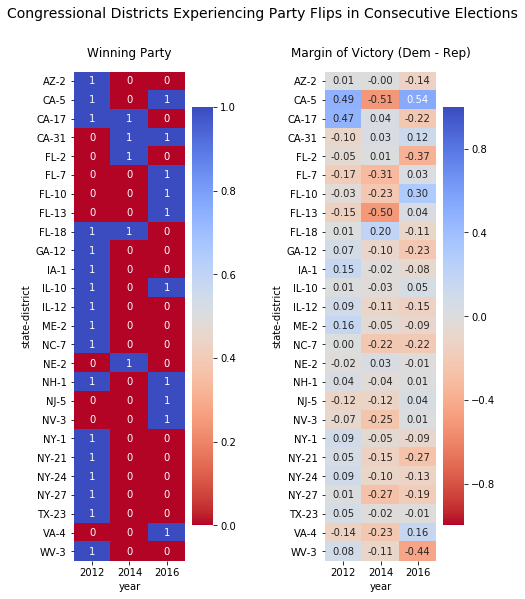

In [258]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (7, 9))

sns.heatmap(party_winner_pt, cmap = 'coolwarm_r', annot = True, ax = ax1)
sns.heatmap(win_margin_pt, cmap = 'coolwarm_r', vmin = -1, vmax = 1, fmt= '.2f', annot = True, ax = ax2)

# adjust space between plats
plt.subplots_adjust(wspace = 0.8)

ax1.set_title("Winning Party", pad = 15, size = 12)
ax2.set_title("Margin of Victory (Dem - Rep)", pad = 15, size = 12)
plt.suptitle("Congressional Districts Experiencing Party Flips in Consecutive Elections", size = 14)

plt.show()